In [36]:
import pandas as pd
import numpy as np
import verde as vd
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy.spatial.distance import pdist, squareform
import seaborn as sns; sns.set()
sns.set_style('darkgrid', {'legend.frameon':True})
%matplotlib inline

In [44]:
import rasterio
import rasterio.plot
import matplotlib as mpl
from descartes import PolygonPatch
import rasterio.plot
import matplotlib.ticker as tkr
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s

fu = rasterio.open("ftunion2864.tif")
la = rasterio.open("lance2864.tif")
tfuwells = gpd.read_file(r"F:\Geology\WSGS\Projects\Unconformity or onlap\predictions\shapefiles\ftunion_KNN_predictions_prob.shp")
klawells = gpd.read_file(r"F:\Geology\WSGS\Projects\Unconformity or onlap\predictions\shapefiles\lance_KNN_predictions_prob.shp")
lance = gpd.read_file(r'shapefiles/lance_outcrop.shp')
ftun = gpd.read_file(r'shapefiles/ftunion_outcrop.shp')
faults = gpd.read_file(r'shapefiles/simp_faults.shp')
sections = gpd.read_file(r'shapefiles/crossection.shp',)

In [45]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:4326'

with rasterio.open('lance2864.tif') as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('lance2864_reproject.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

In [46]:
fu = rasterio.open("ftunion2864_reproject.tif")
la = rasterio.open("lance2864_reproject.tif")

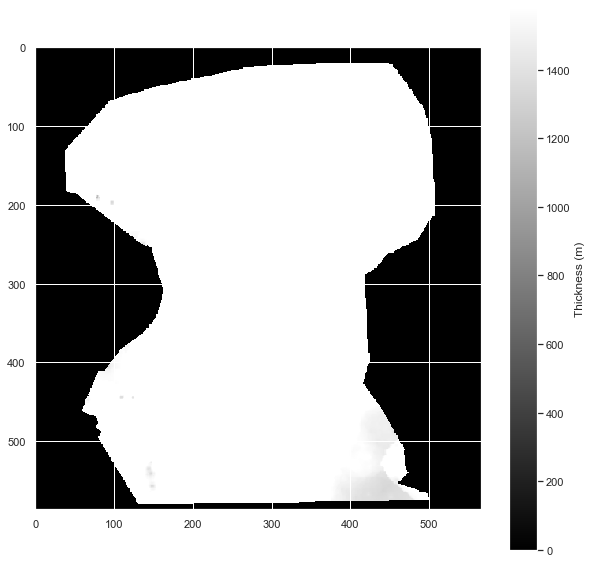

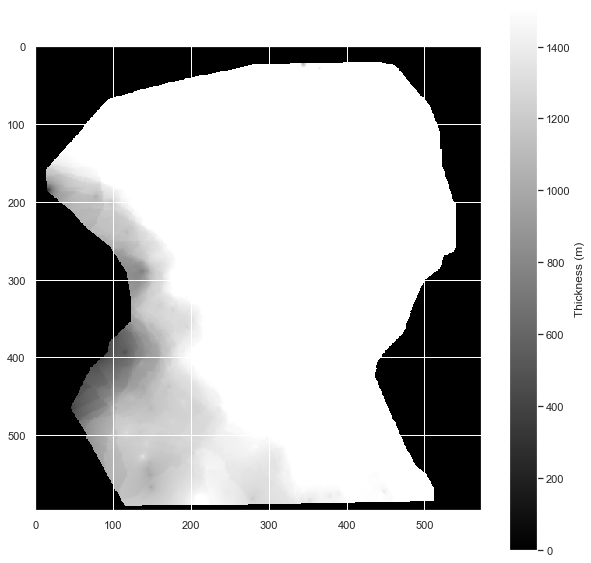

In [47]:
filepath = "ftunion2864.tif"
fig, ax = plt.subplots(figsize=(10, 10))

with rasterio.open(filepath) as src:
    e = src.read().astype(int)
plt.imshow(e[0], cmap='gray', vmin=0, vmax=5200*0.3048)
plt.colorbar(label='Thickness (m)')
plt.savefig('fortunioncolorbar.pdf')

filepath = "lance2864.tif"
fig, ax = plt.subplots(figsize=(10, 10))

with rasterio.open(filepath) as src:
    e = src.read().astype(int)
plt.imshow(e[0], cmap='gray', vmin=0, vmax=4961*0.3048)
plt.colorbar(label='Thickness (m)')
plt.savefig('lancecolorbar.pdf')

In [48]:
tfuwells = tfuwells.to_crs('epsg:4326')
klawells = klawells.to_crs('epsg:4326')
lance = lance.to_crs('epsg:4326')
ftun = ftun.to_crs('epsg:4326')
faults = faults.to_crs('epsg:4326')
sections = sections.to_crs('epsg:4326')

C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax 

In [49]:
truncation_color = '#ffffbf'
onlap_color = '#2c7bb6'
horiz_color = '#d7191c'

from matplotlib.colors import LinearSegmentedColormap

truncCmap = LinearSegmentedColormap.from_list('mycmap', [onlap_color, truncation_color])
onlapCmap = LinearSegmentedColormap.from_list('mycmap', [truncation_color, onlap_color])
horizCmap = LinearSegmentedColormap.from_list('mycmap', [onlap_color, horiz_color])


tfuwells.probabilit
newscore = 50 * (tfuwells.probabilit)

tfuwells['newprob'] = newscore
klawells['newprob'] = newscore

futruncation = tfuwells[tfuwells['prediction']== 0]
fuonlap = tfuwells[tfuwells['prediction']== 1]
fuhorizontal = tfuwells[tfuwells['prediction']== 2]

latruncation = klawells[klawells['prediction']== 0]
laonlap = klawells[klawells['prediction']== 1]
lahorizontal = klawells[klawells['prediction']== 2]

In [50]:
fthoriz = tfuwells[(tfuwells.horiz_prob>0.)]
lahoriz = klawells[(klawells.horiz_prob>0.)]


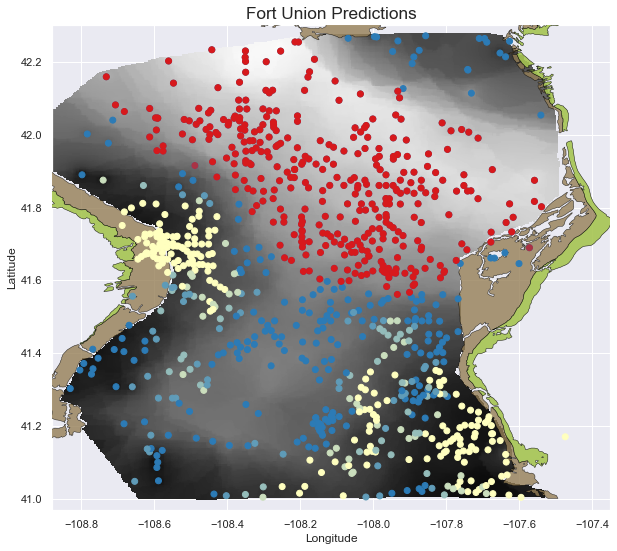

In [51]:
#y_format = tkr.FuncFormatter(func)
fig, ax = plt.subplots(figsize=(10, 10))
#ax.yaxis.set_major_formatter(y_format)
#ax.xaxis.set_major_formatter(y_format)
rasterio.plot.show(fu, ax=ax, cmap='gray', zorder=1)
#rasterio.plot.show(fu, ax=ax, contour=True, contour_label_kws={'fmt':'%1.0f', 'colors':'black'}, zorder=2)
#fuhorizontal.plot(ax=ax, markersize=fuhorizontal['newprob']/4, color='#d7191c', label='Horizontal', legend=True, alpha=0.9, zorder=6)
#futruncation.plot(ax=ax, markersize=futruncation['newprob']/4, color='#ffffbf', label='Truncation', legend=True, alpha=0.9, zorder=4)
#fuonlap.plot(ax=ax, markersize=fuonlap['newprob']/4, color='#2c7bb6', label='Onlap', legend=True, alpha=0.9, zorder=5)
tfuwells.plot(ax=ax, column='trunc_prob', cmap=truncCmap, vmin=0, vmax=1, zorder=4)
fthoriz.plot(ax=ax, column='horiz_prob', cmap=horizCmap, vmin=0, vmax=1, zorder=5)

kwarg2s = {'facecolor': '#957F56', 'edgecolor': 'black', 'linewidth': 0.5, 'hatch': ''}
ftun.plot(ax=ax, zorder=3, label='Fort Union Outcrop', alpha=0.8, **kwarg2s)
kwarg3s = {'facecolor': '#A6C551', 'edgecolor': 'black', 'linewidth': 0.5, 'hatch': ''}
lance.plot(ax=ax, **kwarg3s, zorder=3, alpha=0.9)
#tfuwells[tfuwells.probabilit < 0.6].plot(ax=ax, zorder=7, color='none', edgecolor='red', label='Probability < 0.6', markersize=80)

#plt.legend()
plt.title('Fort Union Predictions', size='xx-large')
plt.xlim(-108.88, -107.35)
plt.ylim(40.97, 42.3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('fortunion.pdf', bbox_inches='tight')


In [115]:
fuhorizontal.crs

{'init': 'epsg:4326'}

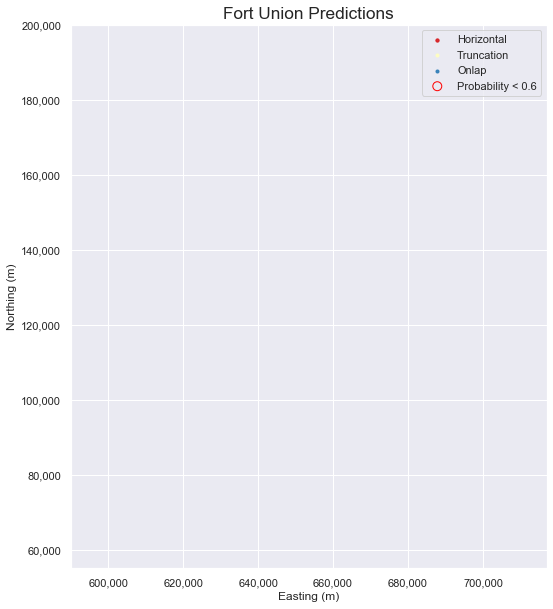

In [28]:
y_format = tkr.FuncFormatter(func)
fig, ax = plt.subplots(figsize=(10, 10))
ax.yaxis.set_major_formatter(y_format)
ax.xaxis.set_major_formatter(y_format)
rasterio.plot.show(fu, ax=ax, cmap='gray', zorder=1)
#rasterio.plot.show(fu, ax=ax, contour=True, contour_label_kws={'fmt':'%1.0f', 'colors':'black'}, zorder=2)
fuhorizontal.plot(ax=ax, markersize=fuhorizontal['newprob']/4, color='#d7191c', label='Horizontal', legend=True, alpha=0.9, zorder=6)
futruncation.plot(ax=ax, markersize=futruncation['newprob']/4, color='#ffffbf', label='Truncation', legend=True, alpha=0.9, zorder=4)
fuonlap.plot(ax=ax, markersize=fuonlap['newprob']/4, color='#2c7bb6', label='Onlap', legend=True, alpha=0.9, zorder=5)
ftun.plot(ax=ax, color='#957F56', edgecolor='black', zorder=3, label='Fort Union Outcrop', alpha=0.8, legend=True)
kwarg3s = {'facecolor': '#A6C551', 'edgecolor': 'black', 'linewidth': 1.5, 'hatch': ''}
lance.plot(ax=ax, **kwarg3s, zorder=3, alpha=0.9)
tfuwells[tfuwells.probabilit < 0.6].plot(ax=ax, zorder=7, color='none', edgecolor='red', label='Probability < 0.6', markersize=80)

plt.legend()
plt.title('Fort Union Predictions', size='xx-large')
plt.xlim(590000, 717000)
plt.ylim(55000, 200000)
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
#plt.savefig('fortunion_prob.pdf', bbox_inches='tight')



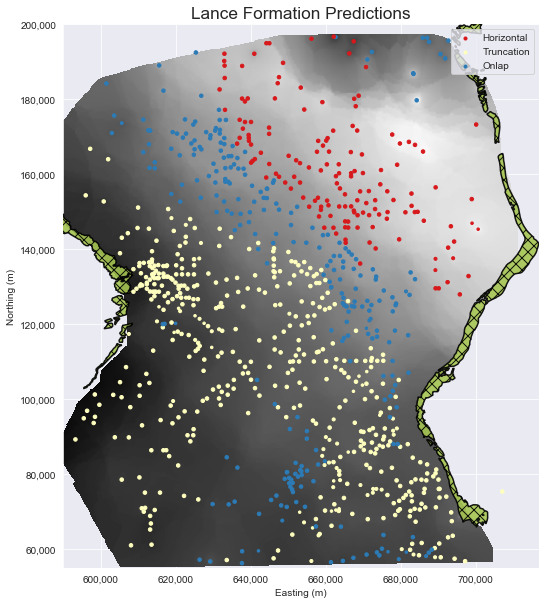

In [30]:
y_format = tkr.FuncFormatter(func)
fig, ax = plt.subplots(figsize=(10, 10))
ax.yaxis.set_major_formatter(y_format)
ax.xaxis.set_major_formatter(y_format)
rasterio.plot.show(la, ax=ax, cmap='gray', zorder=1)
#rasterio.plot.show(la, ax=ax, contour=True, contour_label_kws={'fmt':'%1.0f'}, zorder=2)
lahorizontal.plot(ax=ax, markersize=lahorizontal['newprob']/4, color='#d7191c', label='Horizontal', legend=True, zorder=6)
latruncation.plot(ax=ax, markersize=latruncation['newprob']/4, color='#ffffbf', label='Truncation', legend=True, zorder=4)
laonlap.plot(ax=ax, markersize=laonlap['newprob']/4, color='#2c7bb6', label='Onlap', legend=True, zorder=5)
kwarg3s = {'facecolor': '#A6C551', 'edgecolor': 'black', 'linewidth': 1.5, 'hatch': 'xx'}
lance.plot(ax=ax, **kwarg3s, zorder=3, alpha=0.9)
plt.legend()
plt.title('Lance Formation Predictions', size='xx-large')
plt.xlim(590000, 717000)
plt.ylim(55000, 200000)
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.savefig('lance.pdf', bbox_inches='tight')

No handles with labels found to put in legend.


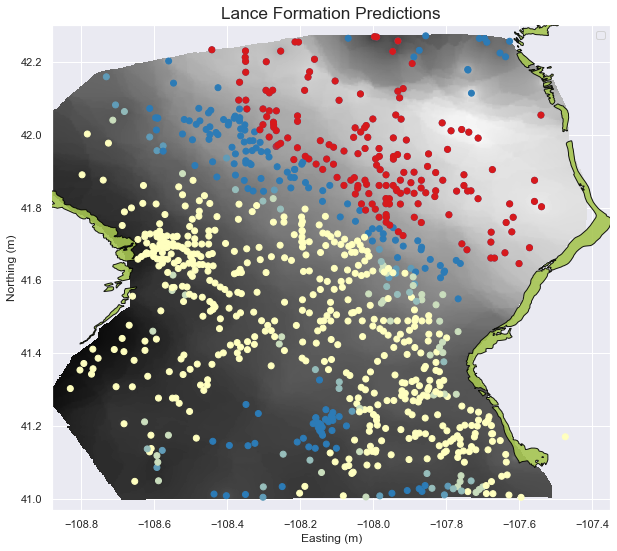

In [52]:
#y_format = tkr.FuncFormatter(func)
fig, ax = plt.subplots(figsize=(10, 10))
#ax.yaxis.set_major_formatter(y_format)
#ax.xaxis.set_major_formatter(y_format)
rasterio.plot.show(la, ax=ax, cmap='gray', zorder=1)
#lahorizontal.plot(ax=ax, markersize=lahorizontal['newprob']/4, color='#d7191c', label='Horizontal', legend=True, zorder=6)
#latruncation.plot(ax=ax, markersize=latruncation['newprob']/4, color='#ffffbf', label='Truncation', legend=True, zorder=4)
#laonlap.plot(ax=ax, markersize=laonlap['newprob']/4, color='#2c7bb6', label='Onlap', legend=True, zorder=5)
#klawells[klawells.probabilit < 0.6].plot(ax=ax, zorder=7, color='none', edgecolor='red', label='Probability < 0.6', markersize=80)
klawells.plot(ax=ax, column='trunc_prob', cmap=truncCmap, vmin=0, vmax=1, zorder=4)
lahoriz.plot(ax=ax, column='horiz_prob', cmap=horizCmap, vmin=0, vmax=1, zorder=5)
lance.plot(ax=ax, color='#A6C551', edgecolor='black', zorder=3, alpha=0.9)
plt.legend()
plt.title('Lance Formation Predictions', size='xx-large')
plt.xlim(-108.88, -107.35)
plt.ylim(40.97, 42.3)
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.savefig('lance_prob.pdf', bbox_inches='tight')

In [71]:
klawells['form'] = 'Kl'
tfuwells['form'] ='Tfu'
full = pd.DataFrame(klawells.append(tfuwells))

In [83]:
klawells.prediction.value_counts().values[2]

164

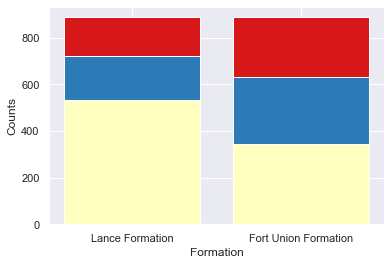

In [72]:

names = ('Lance Formation','Fort Union Formation')
plt.bar([0], klawells.prediction.value_counts().values[0], color='#ffffbf') #truncation
plt.bar([0], klawells.prediction.value_counts().values[1],color='#2c7bb6', bottom=klawells.prediction.value_counts().values[0]) #onlap
plt.bar([0], klawells.prediction.value_counts().values[2], color='#d7191c', 
        bottom=klawells.prediction.value_counts().values[0]+klawells.prediction.value_counts().values[1]) #horizontal

plt.bar([1], tfuwells.prediction.value_counts().values[0], color='#ffffbf')
plt.bar([1], tfuwells.prediction.value_counts().values[1],color='#2c7bb6', bottom=tfuwells.prediction.value_counts().values[0])
plt.bar([1], tfuwells.prediction.value_counts().values[2], color='#d7191c', 
        bottom=tfuwells.prediction.value_counts().values[0]+tfuwells.prediction.value_counts().values[1])



plt.xticks([0,1], names)
plt.xlabel("Formation")
plt.ylabel('Counts')
plt.savefig('valuecounts histogram.pdf')

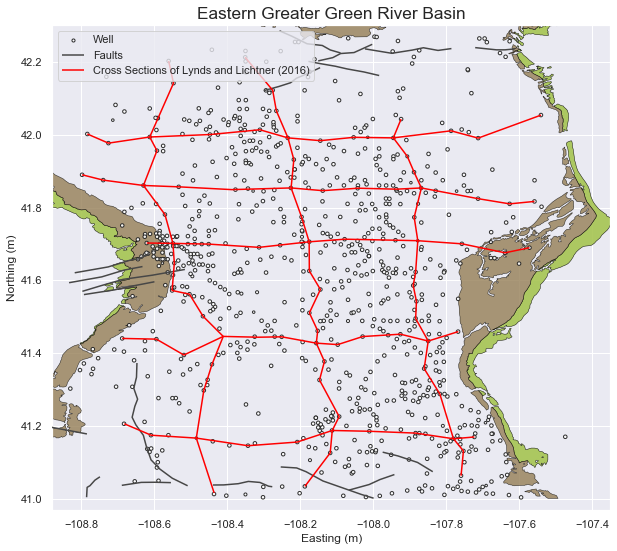

In [124]:
#y_format = tkr.FuncFormatter(func)
fig, ax = plt.subplots(figsize=(10, 10))
#ax.yaxis.set_major_formatter(y_format)
#ax.xaxis.set_major_formatter(y_format)
tfuwells.plot(ax=ax, markersize=lahorizontal['newprob']/4, color='white', edgecolor='k', label='Well', legend=True, alpha=0.9, zorder=3)
kwarg2s = {'facecolor': '#957F56', 'edgecolor': 'black', 'linewidth': 0.5, 'hatch': ''}
ftun.plot(ax=ax, zorder=2, label='Fort Union Outcrop', alpha=0.8, **kwarg2s)
kwarg3s = {'facecolor': '#A6C551', 'edgecolor': 'black', 'linewidth': 0.5, 'hatch': ''}
lance.plot(ax=ax, **kwarg3s, zorder=1, alpha=0.9)
faults.plot(ax=ax, color='#474747', label='Faults', legend=True, zorder=4)
sections.plot(ax=ax, color='red', label='Cross Sections of Lynds and Lichtner (2016)', legend=True, zorder=5)
plt.legend()
plt.title('Eastern Greater Green River Basin', size='xx-large')
plt.xlim(-108.88, -107.35)
plt.ylim(40.97, 42.3)
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.savefig('easternbasin.pdf')